# Analysis of Output from Hybrid Approach

In [121]:
# Import the Pandas library
import pandas as pd

# Read in the output data
df = pd.read_csv('../data/output_df.csv',encoding='utf-8',quotechar='"')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21971 entries, 0 to 21970
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   author                       21971 non-null  object 
 1   deterministic_author         8982 non-null   object 
 2   fuzzy_author                 11075 non-null  object 
 3   fuzzy_author_score           21971 non-null  float64
 4   distilbert_author            21971 non-null  object 
 5   distilbert_author_score      21971 non-null  float64
 6   title                        21971 non-null  object 
 7   matched_title_deterministic  21971 non-null  object 
 8   matched_title_fuzzy          21971 non-null  object 
 9   fuzzy_title_score            21971 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.7+ MB


## First impressions

Just looking at the output of the `info()` method, I see that there are 21,971 total rows in the dataframe. Some of the columns do not have data in all of the rows. Specifically, `deterministic_author` and `fuzzy_author` have empty cells. That suggests that the deterministic method is by far the most "conservative" approach, and it looks like the fuzzy matching approach is a distant second in that regard.

In [122]:
df.describe()

,fuzzy_author_score,distilbert_author_score,fuzzy_title_score
count,21971.000000,21971.000000,21971.000000
mean,0.499591,0.822853,0.168553
std,0.495740,0.285260,0.340532
min,0.000000,0.082294,0.000000
25%,0.000000,0.689063,0.000000
50%,0.916667,0.999995,0.000000
75%,1.000000,0.999999,0.000000
max,1.000000,1.000000,0.900000


The `describe()` method only covers two author matching methods, but it tells its own story. The fuzzy matching method appears to be slightly more liberal, with a 86.04% matching average, while the DistilBERT model had an 82.29% average. More revealing is the quartile output, with 25% of the records getting an 85.5% match from the fuzzy method, but the DistilBERT model returned 68.9% at that level. On the other hand, at the 50% mark and above, the DistilBERT model appears to be slightly more confident.

In [123]:
df.head()

,author,deterministic_author,fuzzy_author,fuzzy_author_score,distilbert_author,distilbert_author_score,title,matched_title_deterministic,matched_title_fuzzy,fuzzy_title_score
0,"Du Creux, François, 1596?-1666.",NaN,NaN,0.00,"{'authorized_name': 'cruz, luís da, 1543-1604...",0.467436,"Historiæ canadensis, seu Novæ-Franciæ libri de...",Unknown,Unknown,0.0
1,"Meyer, Ernst H. F. 1791-1858.",NaN,NaN,0.00,"{'authorized_name': 'meyer, wilhelm, 1845-1917...",0.999939,Ernesti Meyer de plantis labradoricis libri tres.,Unknown,Unknown,0.0
2,"Laet, Joannes de, 1593-1649.",NaN,NaN,0.00,"{'authorized_name': 'larroumet, gustave', 'aut...",0.494394,"Novus orbis, seu Descriptionis Indiae Occident...",Unknown,Unknown,0.0
3,"Caesar, Julius",NaN,"{'authorized_name': 'caesar, julius', 'author_...",0.96,"{'authorized_name': 'caesar, julius', 'author_...",0.999999,C. Julii Cæsaris commentariorum De Bello Galli...,Unknown,Unknown,0.0
4,Unknown,NaN,NaN,0.00,{'authorized_name': 'stephanus abbas 4. or 6th...,0.177454,Collectanea latina seu ecclesiasticæ antiquita...,Unknown,Unknown,0.0


In [124]:
# Get the number of unique values in the `author` column
df['author'].nunique()

5556

In [125]:
df['fuzzy_author_score'].value_counts()

fuzzy_author_score
0.000000    10896
1.000000     8982
0.950000      963
0.952381      185
0.960000      174
0.956522      168
0.981818       54
0.937500       49
0.961538       47
0.962963       46
0.916667       46
0.967742       40
0.970588       39
0.965517       34
0.909091       25
0.983051       21
0.985075       16
0.958333       13
0.981132       12
0.904762       10
0.980392       10
0.947368       10
0.958904       10
0.968750        9
0.912281        7
0.979592        7
0.901695        7
0.923077        7
0.976190        6
0.901961        5
0.964286        4
0.928571        4
0.975610        4
0.977778        4
0.909859        4
0.914286        4
0.966667        4
0.972222        3
0.976744        3
0.941176        3
0.954545        3
0.985507        3
0.972973        3
0.917241        3
0.936170        2
0.914815        2
0.963855        2
0.929577        2
0.983607        2
0.987013        2
0.969697        2
0.918919        2
0.984127        1
0.903279        1
0.916471 

## Deterministic Author Matching

I want to see where this method reported a match.

In [126]:
# Make a dataframe of just the author and deterministic author columns
deterministic = df[['author','deterministic_author']]
# Filter out the NA values
deterministic = deterministic[deterministic['deterministic_author'].notna()]
deterministic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8982 entries, 6 to 21968
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   author                8982 non-null   object
 1   deterministic_author  8982 non-null   object
dtypes: object(2)
memory usage: 210.5+ KB


In [127]:
# Count the number of unique values in the deterministic_author column
print(f"There are {deterministic['deterministic_author'].nunique()} unique authors in the deterministic dataframe.")

There are 444 unique authors in the deterministic dataframe.


There are 444 unique values in the `deterministic_author` column. That's 12 more than I found in `analysis.ipynb`.

I'm going to make a CSV file so that I can investigate the matches more easily. I'll sort the `deterministic` dataframe by the `author` column first, then save the sorted dataframe as a CSV file.

In [128]:
sorted_deterministic = deterministic.sort_values(axis='index',by='author')
sorted_deterministic_deduped = sorted_deterministic.drop_duplicates(subset='author')

In [129]:
import csv
sorted_deterministic_deduped.to_csv('../data/deterministic_author.csv',index=False,quoting=csv.QUOTE_ALL)

As expected, every match achieved by the deterministic method was 100% accurate. On the other hand, it matched only 432 of the 6,018 unique values in the `author` column.

## Fuzzy Author Matching

In [130]:
# Make a dataframe of the fuzzy matching columns and the author column
fuzzy = df[['author','fuzzy_author','fuzzy_author_score']]
# Eliminate any NaN cells
fuzzy = fuzzy[fuzzy['fuzzy_author'].notna()]

fuzzy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11075 entries, 3 to 21968
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   author              11075 non-null  object 
 1   fuzzy_author        11075 non-null  object 
 2   fuzzy_author_score  11075 non-null  float64
dtypes: float64(1), object(2)
memory usage: 346.1+ KB


In [131]:
# Count the number of unique values in the fuzzy_author column
fuzzy['fuzzy_author'].nunique()

555

The fuzzy matching method returned 511 unique values (down from 1,081 in `analysis.ipynb`), compared to the 6,018 unique values in the `author` column.

Let's see the rows where there isn't a match.

In [132]:
unmatched_fuzzy = df[df['fuzzy_author'].isna()]
# Show the number of unique author values in the unmatched_fuzzy dataframe
display(unmatched_fuzzy['author'].nunique())
# Display the list of unmatched author names
authors_list = unmatched_fuzzy['author'].to_list()
set(authors_list)


4527

{'Possevino, Antonio, (S.I.), 1534-1611.',
 'Huxham, John, 1692-1768.',
 'Gerloff, Johann, 1887-',
 'Hohlenberg, Matthias Haquinus, 1797-1845.',
 'Petau, Denis, 1583-1652.',
 'Malpighi, Marcello, 1628-1694.',
 'Clausen, F.',
 'Locati, Umberto, 1503-1587',
 'Summenhart, Conradus.',
 'Nieremberg, Juan Eusebio, 1595-1658.',
 'Wageningen, Jacob van.',
 'Novotný, František.',
 'Mützell, Wilhelm Julius Karl, 1807-1862.',
 'Zabarella, Jacopo, 1533-1589.',
 'Cinnamus, Ioannes.',
 'Villaverde, Miguel de, (O.F.M.)',
 'Angeli, Alessandro degli, -1620.',
 'Fara, Giovanni Francesco, 1543-1591',
 'Clicthove, Jossé.',
 'Cressolles, Louis, (S.I.), 1568-1634.',
 'Charleton, Walter, 1619-1707.',
 'Sixtinus, Regnerus, 1543-1617',
 'Fauno, Lucio.',
 'Close, A. M.',
 'Moroti, Lodovico',
 'Est, Willem Hesselszoon van, 1542-1613',
 'Hochheim, Albert 1849-',
 'Willis, John, d. 1625.',
 'Massaria, Domenico',
 'Jahn, Johann, 1750-1816',
 'Schwabe, Ludwig von, 1835-1908.',
 'Schoendoerffer, O.C.',
 'Markel, A

The list does not contain any Classical authors, and the authors it does include do not look familiar to me, so it is likely that they simply do not yet have records in the DLL's catalog. I'll save them and use VIAF to make authority records for them at a later date.

In [133]:
unmatched_authors_set = set(authors_list)
with open('../output/unmatched_authors_fuzzy.txt', 'w') as file:
    for author in unmatched_authors_set:
        file.write(f"{author}\n")

In [134]:
filtered = df[~df['author'].isin(unmatched_authors_set)]

**SAM: Use the authors_list to remove unlikely matches from the distilbert results. Remove the deterministically matched results, too.**

In [135]:
print(len(df))
print(len(filtered))

21971
11075


## Distilbert Matching

Let's see how the distilbert author-matching model performed.

In [136]:
distilbert_model = filtered[['author','distilbert_author','distilbert_author_score']].reset_index()
# Eliminate any NaN cells
distilbert_model = distilbert_model[distilbert_model['distilbert_author'].notna()]

distilbert_model.info()

# Count the number of unique values in the fuzzy_author column
print(f"There are {distilbert_model['distilbert_author'].nunique()} unique values in the distilbert_model frame.")
print(f"That is {distilbert_model['distilbert_author'].nunique()-fuzzy['fuzzy_author'].nunique()} more than in the fuzzy frame.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11075 entries, 0 to 11074
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    11075 non-null  int64  
 1   author                   11075 non-null  object 
 2   distilbert_author        11075 non-null  object 
 3   distilbert_author_score  11075 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 346.2+ KB
There are 559 unique values in the distilbert_model frame.
That is 4 more than in the fuzzy frame.


In [137]:
unmatched_distilbert = df[df['distilbert_author'].isna()]
# Show the number of unique author values in the unmatched_distilbert dataframe
print(f"{unmatched_distilbert['author'].nunique()} authors were unmatched by the DistilBERT model.")
# Display the list of unmatched author names
authors_list = unmatched_distilbert['author'].to_list()
set(authors_list)

0 authors were unmatched by the DistilBERT model.


set()

The DistilBERT model identified a match for all authors it encountered, which almost certainly means that there are many incorrect matches.

I want to look at the metrics for the DistilBERT and Fuzzy Matching methods. I'll make a set of ranges from 75% to 100% confidence and count up the numbers in each range per method.

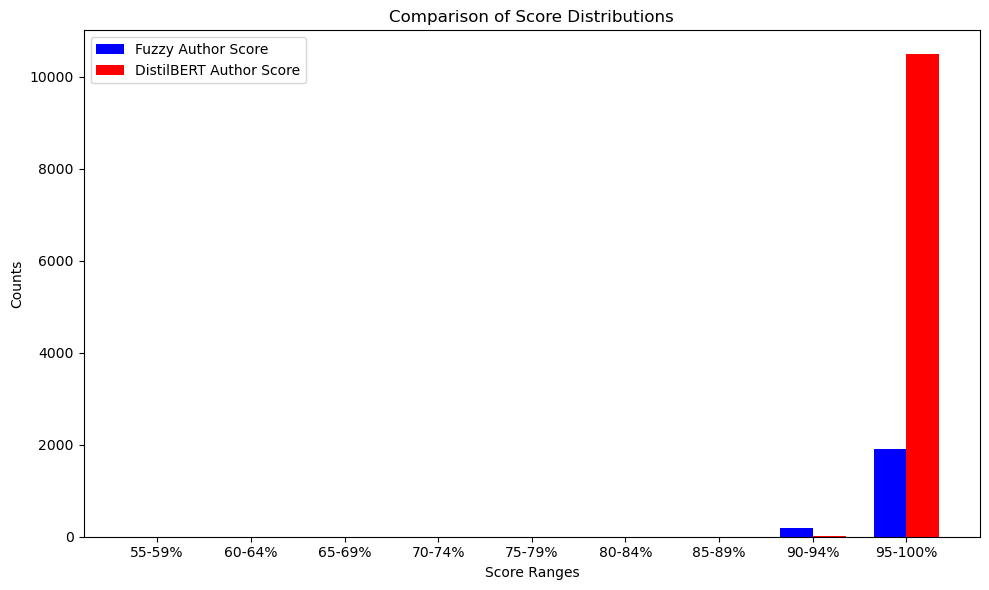

In [138]:
# Visualize the differences
import matplotlib.pyplot as plt
import numpy as np  # Ensure this import is present for array operations

# Assuming 'df' is your original DataFrame with the metrics
bins = [54, 59, 64, 69, 74, 79, 84, 89, 94, 100]
labels = ['55-59%', '60-64%', '65-69%', '70-74%', '75-79%', '80-84%', '85-89%', '90-94%', '95-100%']

metrics = filtered.copy()
metrics['distilbert_author_score'] = (metrics['distilbert_author_score'] * 100).astype(int)
metrics['fuzzy_author_score'] = (metrics['fuzzy_author_score'] * 100).astype(int)

# Initialize an empty DataFrame with labels as index
comparison_df = pd.DataFrame(index=labels)

# Apply pd.cut and calculate value counts, then add to comparison_df
for metric in ['fuzzy_author_score', 'distilbert_author_score']:
    metrics[f'{metric}_range'] = pd.cut(metrics[metric], bins=bins, labels=labels, right=False)
    comparison_df[metric] = metrics[f'{metric}_range'].value_counts().reindex(labels, fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(labels))

bar1 = plt.bar(index, comparison_df['fuzzy_author_score'], bar_width, label='Fuzzy Author Score', color='blue')
bar2 = plt.bar(index + bar_width, comparison_df['distilbert_author_score'], bar_width, label='DistilBERT Author Score', color='red')

plt.xlabel('Score Ranges')
plt.ylabel('Counts')
plt.title('Comparison of Score Distributions')
plt.xticks(index + bar_width / 2, labels)
plt.legend()

plt.tight_layout()
plt.show()

The first time I did this (see `analysis.ipynb`), I hadn't set a limit for the fuzzy or distilbert matching functions. This time, I set 90% as the cutoff. The DistilBERT model still has much higher numbers at the highest confidence rating, but, as I learned before, it is often too confident.

I want to take a closer look at the DistilBERT model's matches.

In [145]:
db_90_100 = metrics[(metrics['distilbert_author_score_range'] == "95-100%") | (metrics['distilbert_author_score_range'] == "90-94%")]
db_90_100 = db_90_100[['author','distilbert_author']]
grouped = db_90_100.groupby(['author','distilbert_author']).value_counts().to_frame().reset_index()
grouped.to_csv('../output/grouped_distilbert_author_matches_90_100.csv',index=False,encoding='utf-8',quoting=csv.QUOTE_ALL)

In [148]:
db_90_100

,author,distilbert_author
3,"Caesar, Julius","{'authorized_name': 'caesar, julius', 'author_..."
6,"Kircher, Athanasius, 1602-1680","{'authorized_name': 'kircher, athanasius, 1602..."
11,"Hincmar, Archbishop of Reims, approximately 80...","{'authorized_name': 'hincmar, archbishop of re..."
12,"Acosta, José de, 1540-1600,","{'authorized_name': 'acosta, josé de, 1540-16..."
13,"Hincmar, Archbishop of Reims, approximately 80...","{'authorized_name': 'hincmar, archbishop of re..."
...,...,...
21961,"Thomas, Aquinas, Saint, 1225?-1274.","{'authorized_name': 'thomas, aquinas, saint', ..."
21962,"Thomas, Aquinas, Saint, 1225?-1274.","{'authorized_name': 'thomas, aquinas, saint', ..."
21963,"Thomas, Aquinas, Saint, 1225?-1274.","{'authorized_name': 'thomas, aquinas, saint', ..."
21964,"Thomas, Aquinas, Saint, 1225?-1274.","{'authorized_name': 'thomas, aquinas, saint', ..."


In [149]:
# Use the `normalize_author_name()` utility function to lower the `author` value and remove punctuation.
import utilities as utilities
db_90_100['stripped_author'] = db_90_100['author'].apply(lambda x: utilities.normalize_author_name(x))

import ast
db_90_100['distil_author_only'] = db_90_100['distilbert_author'].apply(lambda x: ast.literal_eval(x)['authorized_name'] if isinstance(x, str) else x['authorized_name'])
db_90_100['distil_author_only'] = db_90_100['distil_author_only'].apply(lambda x: utilities.normalize_author_name(x))

db_90_100 = db_90_100[['stripped_author','distil_author_only']]




In [150]:
unique_authors = db_90_100.drop_duplicates(subset=['stripped_author','distil_author_only'])
unique_authors

,stripped_author,distil_author_only
3,caesar julius,caesar julius
6,kircher athanasius 16021680,kircher athanasius 16021680
11,hincmar archbishop of reims approximately 806882,hincmar archbishop of reims
12,acosta jose de 15401600,acosta jose de 15401600
30,mersenne marin 15881648,mersenne marin 15881648
...,...,...
21147,walram bishop of naumberg d 1111,walram bishop of naumburg
21176,florus lucius annaeus 2nd cent,florus lucius annaeus
21353,averroes 11261198,averroes 11261198
21462,victorinus saint bishop of poetovio 304,victorinus saint bishop of poetovio


I'll use the `partial_token_set_ratio` method from the rapidfuzz package to compare the two values in each row.

In [151]:
from rapidfuzz import fuzz, process

unique_authors.loc[:,'partial_token_set'] = [
    fuzz.partial_token_set_ratio(a, b)
    for a, b in zip(unique_authors['stripped_author'], unique_authors['distil_author_only'])
]

unique_authors.loc[:,'token_set'] = [
    fuzz.token_set_ratio(a, b)
    for a, b in zip(unique_authors['stripped_author'], unique_authors['distil_author_only'])
]

unique_authors.loc[:,'token_sort'] = [
    fuzz.token_sort_ratio(a, b)
    for a, b in zip(unique_authors['stripped_author'], unique_authors['distil_author_only'])
]

unique_authors.to_csv('../output/unique_authors_fuzzy_scores.csv',index=False,encoding='utf-8',quoting=csv.QUOTE_ALL)

/var/folders/73/ldt1v6c15m52k8nzfbwmbvg00000gn/T/ipykernel_77079/870449270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_authors.loc[:,'partial_token_set'] = [
/var/folders/73/ldt1v6c15m52k8nzfbwmbvg00000gn/T/ipykernel_77079/870449270.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_authors.loc[:,'token_set'] = [
/var/folders/73/ldt1v6c15m52k8nzfbwmbvg00000gn/T/ipykernel_77079/870449270.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [152]:
unique_authors = pd.read_csv('../output/unique_authors_fuzzy_scores.csv')

In [153]:
unique_authors['std'] = unique_authors.std(axis=1, numeric_only=True)

In [154]:
unique_authors.to_csv('../output/unique_authors_with_stdev.csv',index=False)

In [155]:
# Assuming 'df' is your original DataFrame with the metrics
bins = [0,1,2,3,4,5,6]
labels = [0,1,2,3,4,5]
# Applying pd.cut and counting values for each metric
for metric in ['std']:
    unique_authors[f'{metric}_range'] = pd.cut(unique_authors[metric], bins=bins, labels=labels, right=False)
    print(f"Counts for {metric}:")
    print(unique_authors[f'{metric}_range'].value_counts().sort_index())
    print("\n")

Counts for std:
std_range
0    377
1     13
2     13
3     23
4     11
5     18
Name: count, dtype: int64




In [193]:
fuzzy_compare = pd.read_csv('../output/unique_authors_with_stdev.csv')

In [194]:
fuzzy_compare

,stripped_author,distil_author_only,partial_token_set,token_set,token_sort,std
0,caesar julius,caesar julius,100.0,100.000000,100.000000,0.000000
1,kircher athanasius 16021680,kircher athanasius 16021680,100.0,100.000000,100.000000,0.000000
2,hincmar archbishop of reims approximately 806882,hincmar archbishop of reims,100.0,100.000000,72.000000,16.165808
3,acosta jose de 15401600,acosta jose de 15401600,100.0,100.000000,100.000000,0.000000
4,mersenne marin 15881648,mersenne marin 15881648,100.0,100.000000,100.000000,0.000000
...,...,...,...,...,...,...
721,walram bishop of naumberg d 1111,walram bishop of naumburg,100.0,84.210526,84.210526,9.116057
722,florus lucius annaeus 2nd cent,florus lucius annaeus,100.0,100.000000,82.352941,10.188534
723,averroes 11261198,averroes 11261198,100.0,100.000000,100.000000,0.000000
724,victorinus saint bishop of poetovio 304,victorinus saint bishop of poetovio,100.0,100.000000,94.594595,3.120812


In [158]:
fuzzy_compare['pts_tset'] = fuzzy_compare['partial_token_set'] - fuzzy_compare['token_set']

In [159]:
fuzzy_compare['pts_tsort'] = fuzzy_compare['partial_token_set'] - fuzzy_compare['token_sort']

In [160]:
fuzzy_compare['tset_tsort'] = fuzzy_compare['token_set'] + fuzzy_compare['token_sort']

In [161]:
fuzzy_compare['mean'] = fuzzy_compare.loc[:, ["partial_token_set","token_set","token_sort"]].mean(axis = 1)

In [162]:
fuzzy_compare.to_csv('../output/unique_authors_fuzzy_scores_2.csv',index=False)

In [189]:
fuzzy_compare = pd.read_csv('../output/unique_authors_fuzzy_scores_3.csv')

In [190]:
fuzzy_compare.columns

Index(['stripped_author', 'distil_author_only', 'partial_token_set',
       'token_set', 'token_sort', 'std', 'correct', 'pts_tset', 'pts_tsort',
       'tset_tsort', 'mean'],
      dtype='object')

Manual review shows that fewer than 10 out of 726 author names were incorrectly matched!

## What about Titles?

This is where the automation really matters. If it can't handle titles accurately, it hasn't really saved much time, since titles take by far that longest amount of time to reconcile manually.

This is where the approach might need adjustment. Specifically, I need to consider using the DistilBERT matching score as the trigger for narrowing down the potential titles to be matched.

In [86]:
title_df = df[['author','title','deterministic_author','matched_title_deterministic', 'fuzzy_author','matched_title_fuzzy','fuzzy_title_score']]

In [94]:
# How many titles were matched with the deterministic method?
deterministic_not_unknown = title_df[title_df['matched_title_deterministic'] != "Unknown"]
print(deterministic_not_unknown.info())
deterministic_not_unknown['matched_title_deterministic'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 236 to 21774
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   author                       213 non-null    object 
 1   title                        213 non-null    object 
 2   deterministic_author         175 non-null    object 
 3   matched_title_deterministic  213 non-null    object 
 4   fuzzy_author                 190 non-null    object 
 5   matched_title_fuzzy          213 non-null    object 
 6   fuzzy_title_score            213 non-null    float64
dtypes: float64(1), object(6)
memory usage: 13.3+ KB
None


matched_title_deterministic
orator            66
panegyricus       47
aeneis            26
apologia          14
ibis               9
cato               8
monarchia          7
brutus             5
germania           4
caligula           4
heptateuchos       4
atticus            3
lepidina           3
pharsalia          2
aeneid             2
scacchia           2
proslogion         1
historia           1
antonius           1
rudens             1
lucullus           1
utopia             1
anticlaudianus     1
Name: count, dtype: int64

In [95]:
# How many titles were matched with the fuzzy method?
fuzzy_not_unknown = title_df[title_df['matched_title_fuzzy'] != "Unknown"]
print(fuzzy_not_unknown.info())
fuzzy_not_unknown['matched_title_fuzzy'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 4324 entries, 66 to 21965
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   author                       4324 non-null   object 
 1   title                        4324 non-null   object 
 2   deterministic_author         2829 non-null   object 
 3   matched_title_deterministic  4324 non-null   object 
 4   fuzzy_author                 3356 non-null   object 
 5   matched_title_fuzzy          4324 non-null   object 
 6   fuzzy_title_score            4324 non-null   float64
dtypes: float64(1), object(6)
memory usage: 270.2+ KB
None


matched_title_fuzzy
singulae uoces ex incertis libris                                                                 340
ab urbe condita                                                                                   332
de rerum natura                                                                                   185
stephani abbatis epistola ad sanctum aunarium                                                     161
in p. clodium et c. curionem                                                                      132
                                                                                                 ... 
in hieremiam prophetam libri vi                                                                     1
de censu animae contra hermogenem (fragmenta apud 'praedestinatum' seruata)                         1
anecdoton holderi: excerpta ex cassiodori libello quod nuncupatur 'ordo generis cassiodororum'      1
excerpta ex libris pompei festi de significatione uerborum    

In [103]:
unknown_titles = title_df[(title_df['matched_title_deterministic'] == "Unknown") & (title_df['matched_title_fuzzy'] == "Unknown")]
unknown_titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17529 entries, 0 to 21970
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   author                       17529 non-null  object 
 1   title                        17529 non-null  object 
 2   deterministic_author         6056 non-null   object 
 3   matched_title_deterministic  17529 non-null  object 
 4   fuzzy_author                 7611 non-null   object 
 5   matched_title_fuzzy          17529 non-null  object 
 6   fuzzy_title_score            17529 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.1+ MB


In [106]:
unknown_titles_known_authors = unknown_titles[~unknown_titles['author'].isin(unmatched_authors_set)]
unknown_titles_known_authors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7611 entries, 3 to 21968
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   author                       7611 non-null   object 
 1   title                        7611 non-null   object 
 2   deterministic_author         6056 non-null   object 
 3   matched_title_deterministic  7611 non-null   object 
 4   fuzzy_author                 7611 non-null   object 
 5   matched_title_fuzzy          7611 non-null   object 
 6   fuzzy_title_score            7611 non-null   float64
dtypes: float64(1), object(6)
memory usage: 475.7+ KB


I'm going to run these unknown titles with known authors through the process_metada function again (see `hybrid.ipynb`) with a different fuzzy matching algorithm.

In [107]:
unknown_titles_known_authors.to_csv('../data/unknown_title_known_authors.csv',index=False,quoting=csv.QUOTE_ALL,encoding='utf-8')

In [195]:
# Read in the results
processed_unknowns = pd.read_csv('../data/unknown_title_known_author_output.csv')
processed_unknowns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7611 entries, 0 to 7610
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   author                       7611 non-null   object 
 1   deterministic_author         6056 non-null   object 
 2   fuzzy_author                 7611 non-null   object 
 3   fuzzy_author_score           7611 non-null   float64
 4   distilbert_author            7611 non-null   object 
 5   distilbert_author_score      7611 non-null   float64
 6   title                        7611 non-null   object 
 7   matched_title_deterministic  7611 non-null   object 
 8   matched_title_fuzzy          7611 non-null   object 
 9   fuzzy_title_score            7611 non-null   float64
dtypes: float64(3), object(7)
memory usage: 594.7+ KB


In [197]:
processed_unknowns['matched_title_fuzzy'].value_counts()

matched_title_fuzzy
Unknown                          6558
a.u.c. perioch. ex p.oxy.668      160
ab urbe condita                   125
periochae librorum a. u. c.       112
de rerum natura                    73
                                 ... 
de linguae latinae usu              1
de grammaticis et rhetoribus        1
de herediolo                        1
de remediis utriusque fortune       1
matheseos libri viii                1
Name: count, Length: 115, dtype: int64

In [198]:
# Write the results to a CSV for closer inspection
processed_unknowns_matched = processed_unknowns[processed_unknowns['matched_title_fuzzy'] != "Unknown"]
processed_unknowns_matched.to_csv('../data/processed_unknowns_matches.csv',index=False,quoting=csv.QUOTE_ALL)

**SAM: You need to do a groupby on the distilbert author match's author value**

Also: sort the processed_unknowns_matched by distilbert author value to make reviewing the matches easier.

Finally: Handle the "opera omnia" matches, then count the deterministic matches, fuzzy matches, and reprocessed fuzzy matches.

In [ ]:
# Define the words to look for in the 'title' column
words = ['opera', 'omnia']

# Create a regular expression pattern to find any of the words, case-insensitive
pattern = '|'.join(words)  # This will be 'opera|omnia'
case_insensitive_pattern = f'(?i){pattern}'  # (?i) makes it case-insensitive

# Find rows where the 'title' contains either 'opera' or 'omnia'
matches = unknown_titles_known_authors['title'].str.contains(case_insensitive_pattern, na=False)

# Filter the DataFrame to only those rows
filtered_df = unknown_titles_known_authors[matches]

# Print or return the filtered DataFrame
display(filtered_df)

,author,title,deterministic_author,matched_title_deterministic,fuzzy_author,matched_title_fuzzy,fuzzy_title_score
11,"Hincmar, Archbishop of Reims, approximately 80...",Hincmari archiepiscopi Remensis opera : duos i...,NaN,Unknown,"{'authorized_name': 'hincmar, archbishop of re...",Unknown,0.0
13,"Hincmar, Archbishop of Reims, approximately 80...",Hincmari archiepiscopi Remensis opera : duos i...,NaN,Unknown,"{'authorized_name': 'hincmar, archbishop of re...",Unknown,0.0
15,"Hincmar, Archbishop of Reims, approximately 80...",Hincmari archiepiscopi Remensis opera : duos i...,NaN,Unknown,"{'authorized_name': 'hincmar, archbishop of re...",Unknown,0.0
28,"Kircher, Athanasius, 1602-1680.",Athanasii Kircheri e Soc. Jesu Arca Noe in tre...,"{'authorized_name': 'kircher, athanasius, 1602...",Unknown,"{'authorized_name': 'kircher, athanasius, 1602...",Unknown,0.0
31,"Hincmar, Archbishop of Reims, approximately 80...",Hincmari archiepiscopi Remensis opera : duos i...,NaN,Unknown,"{'authorized_name': 'hincmar, archbishop of re...",Unknown,0.0
...,...,...,...,...,...,...,...
21892,Horace.,Quinti Horatii Flacci Opera / cum novo comment...,"{'authorized_name': 'horace', 'author_id': 'A4...",Unknown,"{'authorized_name': 'horace', 'author_id': 'A4...",Unknown,0.0
21893,Horace.,Q. Horati Flacci opera recensvervnt O. Keller ...,"{'authorized_name': 'horace', 'author_id': 'A4...",Unknown,"{'authorized_name': 'horace', 'author_id': 'A4...",Unknown,0.0
21894,Horace.,Q. Horatii Flacci Opera / ad praestantium libr...,"{'authorized_name': 'horace', 'author_id': 'A4...",Unknown,"{'authorized_name': 'horace', 'author_id': 'A4...",Unknown,0.0
21895,Horace.,Q. Horati Flacci Opera. Oeuvres d'Horace. Text...,"{'authorized_name': 'horace', 'author_id': 'A4...",Unknown,"{'authorized_name': 'horace', 'author_id': 'A4...",Unknown,0.0


In [ ]:
filtered_df.groupby('author').value_counts()

author                                 title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 deterministic_author                                                               matched_title_deterministic  fuzzy_author                                                                       matched_title_fuzzy  fuzzy_title_score
Agricola, Georg, 1494-1555             Georgii Agricolae De re metallica libri XII : quibus officia, instrumenta, machinae, ac omnia denique ad metallicam spectantia non modò luculentissimè describuntur, sed et per effigies ... ita ob oculos ponuntur ... ; 